In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [2]:
neutral = xr.open_dataset('/home/ashao/dev/GFDL/MOM6_cases/neutral_diffusion/teos10_sigma2//prog_z.nc')
layer = xr.open_dataset('/home/ashao/dev/GFDL/MOM6_cases/neutral_diffusion/teos10_layer/prog_z.nc')

(0.0, 200.0)

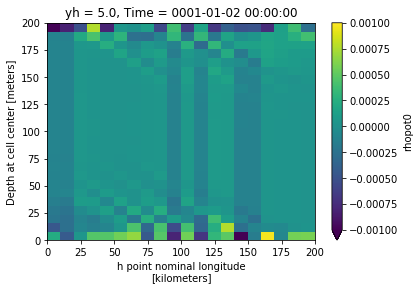

In [44]:
diff = neutral-layer
diff['rhopot0'][0,:,0,:].plot(vmin=-1e-3,vmax=1e-3)
# plt.ylim((50,100))
plt.xlim()

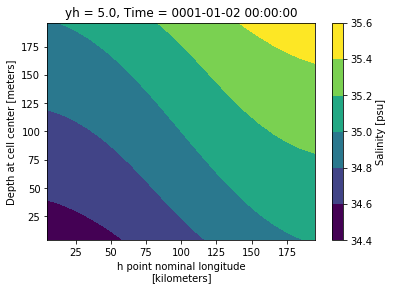

In [46]:
neutral['salt'][0,:,0,:].plot.contourf()

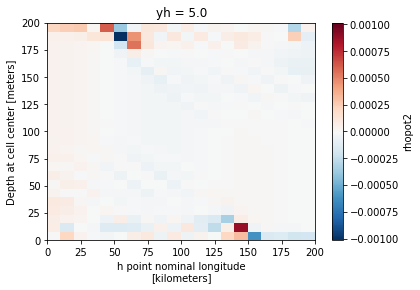

In [47]:
var = 'rhopot2'
delta_rho_neutral = neutral[var][0,:,0,:]-neutral[var][1,:,0,:]
delta_rho_layer = layer[var][0,:,0,:]-layer[var][1,:,0,:]

(delta_rho_neutral-delta_rho_layer).plot()
diff_delta = delta_rho_neutral-delta_rho_layer

In [48]:
spurious_kd = np.abs(((diff_delta*9.8*
                       diff_delta['z_l'][::-1])[4:18,:].sum('z_l')/(86400)*1e5))

<xarray.DataArray ()>
array(0.227658)
Coordinates:
    yh       float64 5.0


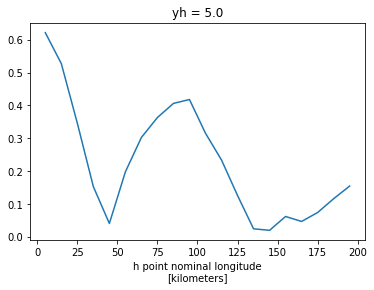

In [49]:
spurious_kd.plot()
print(spurious_kd.mean())

In [50]:
np.abs((delta_rho_layer*9.8*delta_rho_neutral['z_l'][::-1])[4:18].sum('z_l')/(86400)*1e5).mean()

<xarray.DataArray ()>
array(0.409257)
Coordinates:
    yh       float64 5.0